In [1]:
import pandas as pd
import numpy as np

data_dir = "Datasets"
continent_dir = "Asia"

df = pd.read_csv(f"../{data_dir}/BioTIMEQuery_24_06_2021.csv")

/var/folders/9x/qldtrw2s78nfh3dq0zf7l4580000gn/T/ipykernel_44007/3010011116.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"../{data_dir}/BioTIMEQuery_24_06_2021.csv")


In [2]:
study_id = 213

study = df[df["STUDY_ID"] == study_id]
study = study[study["DAY"].notna()]
study = study[study["sum.allrawdata.ABUNDANCE"].notna()]

display(study)

# Get the n species with the most data points
n = 5
species = sorted(pd.unique(study["ID_SPECIES"]), key = lambda x: len(study[study["ID_SPECIES"] == x]), reverse = True)[:n]



,Unnamed: 0,STUDY_ID,DAY,MONTH,YEAR,SAMPLE_DESC,PLOT,ID_SPECIES,LATITUDE,LONGITUDE,sum.allrawdata.ABUNDANCE,sum.allrawdata.BIOMASS,GENUS,SPECIES,GENUS_SPECIES
4831176,4831480,213,10.0,10.0,1965,42.26666641_-69.23332977_1965_10_10__213_22.6,NaN,4709,42.26667,-69.23333,4.0,27.200,Amblyraja,radiata,Amblyraja radiata
4831177,4831481,213,10.0,10.0,1965,42.26666641_-69.23332977_1965_10_10__213_22.6,NaN,5576,42.26667,-69.23333,1.0,0.000,Clupea,harengus,Clupea harengus
4831178,4831482,213,10.0,10.0,1965,42.26666641_-69.23332977_1965_10_10__213_22.6,NaN,5961,42.26667,-69.23333,1.0,0.000,Enchelyopus,cimbrius,Enchelyopus cimbrius
4831179,4831483,213,10.0,10.0,1965,42.26666641_-69.23332977_1965_10_10__213_22.6,NaN,6469,42.26667,-69.23333,29.0,15.400,Hippoglossoides,platessoides,Hippoglossoides platessoides
4831180,4831484,213,10.0,10.0,1965,42.26666641_-69.23332977_1965_10_10__213_22.6,NaN,6875,42.26667,-69.23333,1.0,6.400,Lophius,americanus,Lophius americanus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5270623,5270927,213,9.0,9.0,2008,35.83888626_-74.86958313_2008_9_9_124_189_6.05,NaN,7775,35.83889,-74.86958,1.0,0.048,Phycis,chesteri,Phycis chesteri
5270624,5270928,213,9.0,9.0,2008,35.83888626_-74.86958313_2008_9_9_124_189_6.05,NaN,7887,35.83889,-74.86958,1.0,0.020,Polymixia,lowei,Polymixia lowei
5270625,5270929,213,9.0,9.0,2008,35.83888626_-74.86958313_2008_9_9_124_189_6.05,NaN,8332,35.83889,-74.86958,5.0,0.460,Scorpaenidae,NaN,Scorpaenidae
5270626,5270930,213,9.0,9.0,2008,35.83888626_-74.86958313_2008_9_9_124_189_6.05,NaN,8668,35.83889,-74.86958,1.0,0.034,Synagrops,bellus,Synagrops bellus


In [6]:
# Keep only data with the top n species
top_n = study[study.ID_SPECIES.isin(species)]

for s in species:
    print(s, top_n[top_n["ID_SPECIES"] == s]["GENUS_SPECIES"].unique())

# Add a new column with condensed date information
top_n.loc[:, "DATE"] = top_n['YEAR'].astype(str) + '/' + top_n['MONTH'].astype(int).astype(str).str.pad(width = 2, fillchar = '0') + '/' + top_n['DAY'].astype(int).astype(str).str.pad(width = 2, fillchar = '0')

# Find just the dates that the species have in common
days = set(top_n[top_n["ID_SPECIES"] == species[0]].loc[:, "DATE"].unique())
for s in species:
    days &= set(top_n[top_n["ID_SPECIES"] == s].loc[:, "DATE"].unique())

print("Total datapoints:", len(days))

4831182    Merluccius bilinearis
4831194    Merluccius bilinearis
4831205    Merluccius bilinearis
4831217    Merluccius bilinearis
4831228    Merluccius bilinearis
                   ...          
5270125    Merluccius bilinearis
5270152    Merluccius bilinearis
5270182    Merluccius bilinearis
5270208    Merluccius bilinearis
5270306    Merluccius bilinearis
Name: GENUS_SPECIES, Length: 21479, dtype: object
4831184    Squalus acanthias
4831197    Squalus acanthias
4831208    Squalus acanthias
4831219    Squalus acanthias
4831230    Squalus acanthias
                 ...        
5270036    Squalus acanthias
5270049    Squalus acanthias
5270103    Squalus acanthias
5270129    Squalus acanthias
5270156    Squalus acanthias
Name: GENUS_SPECIES, Length: 15564, dtype: object
4831294    Doryteuthis pealeii
4831304    Doryteuthis pealeii
4831312    Doryteuthis pealeii
4831323    Doryteuthis pealeii
4831338    Doryteuthis pealeii
                  ...         
5270515    Doryteuthis pealeii
5

/var/folders/9x/qldtrw2s78nfh3dq0zf7l4580000gn/T/ipykernel_44007/3720319805.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_n.loc[:, "DATE"] = top_n['YEAR'].astype(str) + '/' + top_n['MONTH'].astype(int).astype(str).str.pad(width = 2, fillchar = '0') + '/' + top_n['DAY'].astype(int).astype(str).str.pad(width = 2, fillchar = '0')


/var/folders/9x/qldtrw2s78nfh3dq0zf7l4580000gn/T/ipykernel_44007/1730275259.py:17: PerformanceWarning: indexing past lexsort depth may impact performance.
  by_species.at[day, s] = np.sum(days_cleaned.loc[(s, day), "sum.allrawdata.ABUNDANCE"])


<Axes: xlabel='DATE'>

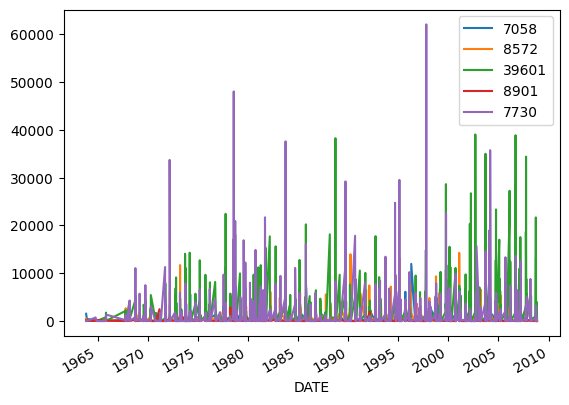

In [4]:
# Remove data for days not shared by all species
days_cleaned = top_n[top_n["DATE"].isin(days)]
days_cleaned.set_index(["ID_SPECIES", "DATE"], inplace = True)

# Make a new dataframe that will match species and dates to abundance
by_species = pd.DataFrame()
by_species["DATE"] = pd.to_datetime(sorted(days))
by_species.set_index("DATE", inplace = True)

# Add each target species to the dataframe
for s in species:
    by_species[s] = None

# Condense data for each species and date
for day in days:
    for s in species:
        by_species.at[day, s] = np.sum(days_cleaned.loc[(s, day), "sum.allrawdata.ABUNDANCE"])

# Plot the species abundance over time
by_species.plot(y = species, use_index = True)

In [5]:
by_species.to_csv(f"../{data_dir}/study_{study_id}/top_{n}_{study_id}.csv")